In [1]:
from evo.core import metrics

In [2]:
from evo.tools import log
log.configure_logging(verbose=True, debug=True, silent=False)

import pprint
import numpy as np

from evo.tools import plot
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook

# temporarily override some package settings
from evo.tools.settings import SETTINGS
SETTINGS.plot_usetex = False

[DEBUG][2023-02-10 15:12:32,220][log.configure_logging():112]
System info:
Python 3.8.10
Linux-5.15.0-58-generic-x86_64-with-glibc2.29
hasar@hasar



In [3]:
from evo.tools import file_interface
ref_file = "GT.csv"
est_file = "drone.csv"
traj_ref = file_interface.read_tum_trajectory_file(ref_file)
traj_est = file_interface.read_tum_trajectory_file(est_file)

[DEBUG][2023-02-10 15:12:33,625][file_interface.read_tum_trajectory_file():117]
Loaded 1396 stamps and poses from: GT.csv
[DEBUG][2023-02-10 15:12:33,628][file_interface.read_tum_trajectory_file():117]
Loaded 194 stamps and poses from: drone.csv


In [21]:
from evo.core import sync

max_diff = 0.6        #Set time diff  

traj_ref, traj_est = sync.associate_trajectories(traj_ref, traj_est, max_diff)

[DEBUG][2023-02-10 15:14:29,073][sync.associate_trajectories():110]
Found 174 of max. 174 possible matching timestamps between...
	first trajectory
and:	second trajectory
..with max. time diff.: 0.6 (s) and time offset: 0.0 (s).


In [19]:
import copy

traj_est_aligned = copy.deepcopy(traj_est)
traj_est_aligned.align(traj_ref, correct_scale=False, correct_only_scale=False)

[DEBUG][2023-02-10 15:14:21,638][trajectory.align():200]
Aligning using Umeyama's method...
[DEBUG][2023-02-10 15:14:21,640][trajectory.align():212]
Rotation of alignment:
[[ 0.38203177 -0.9204553  -0.08254558]
 [ 0.92111398  0.38648831 -0.0466458 ]
 [ 0.07483828 -0.05821371  0.99549505]]
Translation of alignment:
[2.1137876  1.00460145 0.1529903 ]
[DEBUG][2023-02-10 15:14:21,641][trajectory.align():214]
Scale correction: 1.0


(array([[ 0.38203177, -0.9204553 , -0.08254558],
        [ 0.92111398,  0.38648831, -0.0466458 ],
        [ 0.07483828, -0.05821371,  0.99549505]]),
 array([2.1137876 , 1.00460145, 0.1529903 ]),
 1.0)

<IPython.core.display.Javascript object>


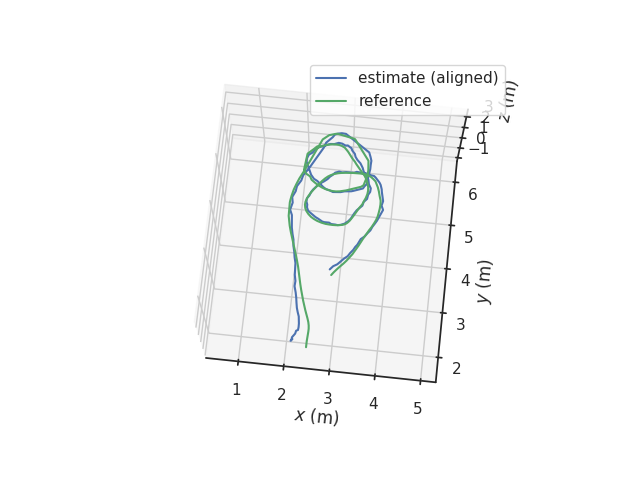

In [20]:
fig = plt.figure()
traj_by_label = {
    "estimate (aligned)": traj_est_aligned,
    "reference": traj_ref
}
plot.trajectories(fig, traj_by_label, plot.PlotMode.xyz)
plt.show()

In [11]:
print(len(traj_est_aligned.positions_xyz))
print(traj_est_aligned.timestamps)

122
[1.67448306e+09 1.67448306e+09 1.67448306e+09 1.67448306e+09
 1.67448306e+09 1.67448306e+09 1.67448306e+09 1.67448306e+09
 1.67448306e+09 1.67448306e+09 1.67448306e+09 1.67448306e+09
 1.67448306e+09 1.67448306e+09 1.67448306e+09 1.67448306e+09
 1.67448306e+09 1.67448306e+09 1.67448306e+09 1.67448306e+09
 1.67448306e+09 1.67448306e+09 1.67448306e+09 1.67448306e+09
 1.67448306e+09 1.67448306e+09 1.67448306e+09 1.67448306e+09
 1.67448306e+09 1.67448306e+09 1.67448306e+09 1.67448306e+09
 1.67448306e+09 1.67448306e+09 1.67448306e+09 1.67448306e+09
 1.67448306e+09 1.67448306e+09 1.67448306e+09 1.67448306e+09
 1.67448306e+09 1.67448306e+09 1.67448306e+09 1.67448306e+09
 1.67448306e+09 1.67448306e+09 1.67448306e+09 1.67448306e+09
 1.67448306e+09 1.67448306e+09 1.67448306e+09 1.67448306e+09
 1.67448306e+09 1.67448306e+09 1.67448306e+09 1.67448306e+09
 1.67448306e+09 1.67448306e+09 1.67448306e+09 1.67448306e+09
 1.67448306e+09 1.67448306e+09 1.67448307e+09 1.67448307e+09
 1.67448307e+09 1.67

In [12]:
print(traj_est_aligned.positions_xyz)

[[2.48514522 1.68217192 0.31993975]
 [2.50225023 1.67527599 0.26163563]
 [2.49542953 1.67245195 0.26889948]
 [2.47504488 1.67968678 0.3295173 ]
 [2.48334471 1.68509584 0.31599642]
 [2.46655197 1.69628984 0.31758043]
 [2.46993744 1.71053132 0.32471841]
 [2.46506709 1.72947678 0.33499538]
 [2.4673512  1.7631088  0.34515062]
 [2.47232515 1.79516214 0.36264933]
 [2.47779461 1.83565677 0.38614961]
 [2.49890129 1.87223217 0.41243665]
 [2.52444969 1.92970226 0.44050312]
 [2.55288118 1.9788334  0.45190272]
 [2.56944642 2.04073596 0.4791935 ]
 [2.59109822 2.11806502 0.50024337]
 [2.60955163 2.19600855 0.52404234]
 [2.61269293 2.26566322 0.53390699]
 [2.62436313 2.33760132 0.53284081]
 [2.63956115 2.4054477  0.51850525]
 [2.62140928 2.47974284 0.51904296]
 [2.62024162 2.53467693 0.5092795 ]
 [2.60071484 2.59451823 0.51049195]
 [2.56656148 2.66220059 0.52000123]
 [2.55971116 2.72010907 0.50955669]
 [2.52799804 2.77758206 0.51490275]
 [2.52277861 2.83084299 0.51667067]
 [2.52405178 2.89248951 0.52

In [13]:
print(traj_est_aligned.positions_xyz[1])

[2.50225023 1.67527599 0.26163563]


In [14]:
print(traj_est_aligned.positions_xyz[1][0])

2.5022502308644277


In [15]:
x = []
y = []
z = []
t = []

In [56]:
for i in range(len(traj_est_aligned.positions_xyz)):
    x.append(traj_est_aligned.positions_xyz[i][0])
    y.append(traj_est_aligned.positions_xyz[i][1])
    z.append(traj_est_aligned.positions_xyz[i][2])
    t.append(traj_est_aligned.timestamps[i])
# print(x)
    

In [57]:
import numpy as np
np.save("data_x.npy", x)
np.save("data_y.npy", y)
np.save("data_z.npy", z)
np.save("time.npy", t)

In [58]:
ls

data_x.npy  e2cnn/                GT.csv*      plot.pdf     Untitled.ipynb
data_y.npy  evo_getpose.py.ipynb  mytikz.tex   test_tex.py
data_z.npy  evoNDTPose.csv        plot_dyn.py  time.npy


In [59]:
traj_x = np.load("data_x.npy")
traj_y = np.load("data_y.npy")
traj_z = np.load("data_z.npy")

In [60]:
ref_x = []
ref_y = []
ref_z = []
for i in range(len(traj_ref.positions_xyz)):
    ref_x.append(traj_ref.positions_xyz[i][0])
    ref_y.append(traj_ref.positions_xyz[i][1])
    ref_z.append(traj_ref.positions_xyz[i][2])


In [62]:
np.save("ref_x.npy", ref_x)
np.save("ref_y.npy", ref_y)
np.save("dref_z.npy", ref_z)

In [38]:
ls


data_x.npy  dref_z.npy            evoNDTPose.csv  plot.pdf   test_tex.py
data_y.npy  e2cnn/                GT.csv*         ref_x.npy  Untitled.ipynb
data_z.npy  evo_getpose.py.ipynb  mytikz.tex      ref_y.npy
